In [1]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from window import as_window
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [3]:
p1

In [4]:
p1.window

In [5]:
type(p1.points)

pandas.core.frame.DataFrame

In [6]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112
       x      y
0  66.22  32.54
1  22.52  22.39
2  31.01  81.21
3   9.47  31.02
4  30.78  60.10


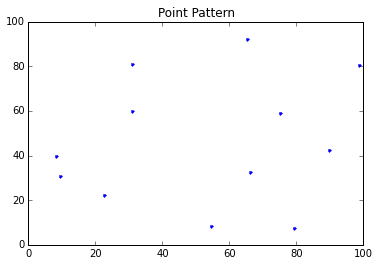

In [7]:
p1.plot()

(0, 150)

/Users/serge/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


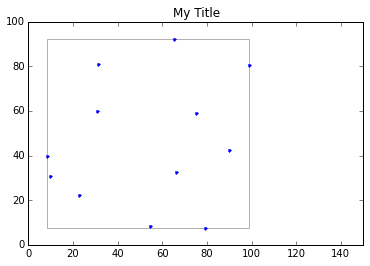

In [8]:
p1.plot(window=True, title="My Title")
plt.xlim(0,150)


# Marks

In [9]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
marks = np.asarray(list('PAPAAPPPAAPA'))
marks = np.asarray([int(i) for i in list('101001110010')])
marks.shape = (12,1)
data = np.asarray(points)
data = np.hstack((data, np.asarray(marks)))
names = 'lon', 'lat', 'presence'
p1 = PointPattern(data, names=names, coord_names=names[:2])
p1.points
#p1.df[['lon', 'lat']] = p1.df[['lon','lat']].astype(float)
p1.df.dtypes

lon         float64
lat         float64
presence    float64
dtype: object

In [10]:
p1.head

<bound method DataFrame.head of       lon    lat  presence
0   66.22  32.54         1
1   22.52  22.39         0
2   31.01  81.21         1
3    9.47  31.02         0
4   30.78  60.10         0
5   75.21  58.93         1
6   79.26   7.68         1
7    8.23  39.93         1
8   98.73  80.53         0
9   89.78  42.53         0
10  65.19  92.08         1
11  54.46   8.48         0>

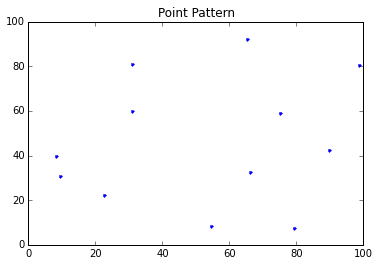

In [11]:
p1.plot()

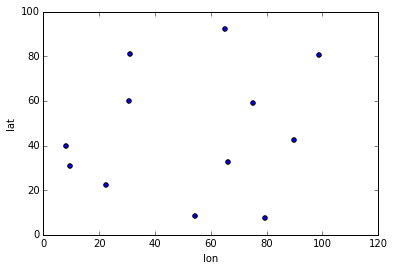

In [12]:
p1.df.plot(kind='scatter', x='lon', y='lat')

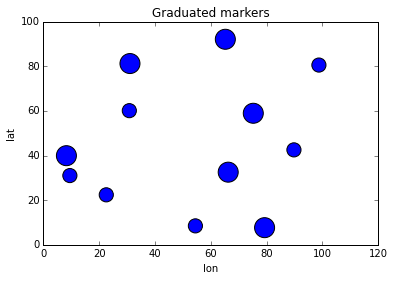

In [13]:
p1.df.plot(kind='scatter', x='lon', y='lat',s =200*(p1.df['presence']+1))
plt.title('Graduated markers')

In [14]:
p1.points['lon']

0     66.22
1     22.52
2     31.01
3      9.47
4     30.78
5     75.21
6     79.26
7      8.23
8     98.73
9     89.78
10    65.19
11    54.46
Name: lon, dtype: float64

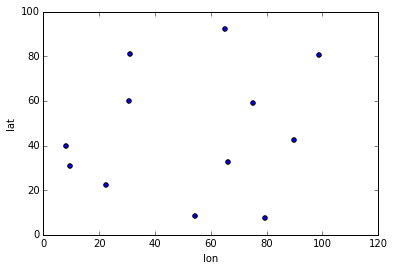

In [15]:
p1.points.plot(kind='scatter', x='lon', y='lat')

In [31]:
p1.df.columns

Index([u'lon', u'lat', u'presence'], dtype='object')

In [33]:
p1.df.presence.name

'presence'

In [34]:
nm = p1.df.presence.name

In [36]:
p1.nm = p1.df[nm]

In [ ]:
s = "{}.{}={}".format()

In [37]:
p1.nm

0     1
1     0
2     1
3     0
4     0
5     1
6     1
7     1
8     0
9     0
10    1
11    0
Name: presence, dtype: float64

In [16]:
pnts = np.random.uniform

In [17]:
pnts = np.random.uniform

In [18]:
pnts = np.random.uniform(0,100, (100,3))
scale = np.array([1,1,10])
pnts = pnts * scale
factor = np.digitize(pnts[:,2], np.arange(0,1000,100))
factor.shape=(-1,1)
names = ['x', 'y', 'population', 'factor']
pnts = np.hstack((pnts, factor))
pp = PointPattern(pnts, names=names, coord_names=names[:2])

In [19]:
pp.head

<bound method DataFrame.head of             x          y  population  factor
0   83.366909  48.051462  389.525702       4
1   43.202675  26.587228  528.408645       6
2   18.360388   4.569935  988.376189      10
3   69.934780   7.518772   25.996886       1
4    4.174699  24.111403  653.483279       7
5   77.405121   6.892927  214.250176       3
6    1.839596  30.533375  894.713238       9
7   99.505517  44.589601  425.052629       5
8   40.744575  41.097902  826.705155       9
9   35.009089  15.247621  489.623456       5
10  51.443700  31.640979  637.038669       7
11  30.015511  83.896171  656.069197       7
12  80.017780  65.752912  180.242319       2
13  97.723452  56.488928  612.256118       7
14  65.115791   1.613409  441.964538       5
15   4.960466  66.510076  484.524832       5
16  92.360756  77.210732  432.995103       5
17  38.254068  13.214502  833.668233       9
18   7.901020  14.115799    8.104485       1
19  19.683352  92.130230  411.918859       5
20   4.429301  49.42811

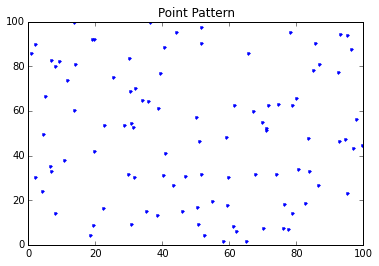

In [20]:
pp.plot()

In [21]:
pp.head

<bound method DataFrame.head of             x          y  population  factor
0   83.366909  48.051462  389.525702       4
1   43.202675  26.587228  528.408645       6
2   18.360388   4.569935  988.376189      10
3   69.934780   7.518772   25.996886       1
4    4.174699  24.111403  653.483279       7
5   77.405121   6.892927  214.250176       3
6    1.839596  30.533375  894.713238       9
7   99.505517  44.589601  425.052629       5
8   40.744575  41.097902  826.705155       9
9   35.009089  15.247621  489.623456       5
10  51.443700  31.640979  637.038669       7
11  30.015511  83.896171  656.069197       7
12  80.017780  65.752912  180.242319       2
13  97.723452  56.488928  612.256118       7
14  65.115791   1.613409  441.964538       5
15   4.960466  66.510076  484.524832       5
16  92.360756  77.210732  432.995103       5
17  38.254068  13.214502  833.668233       9
18   7.901020  14.115799    8.104485       1
19  19.683352  92.130230  411.918859       5
20   4.429301  49.42811

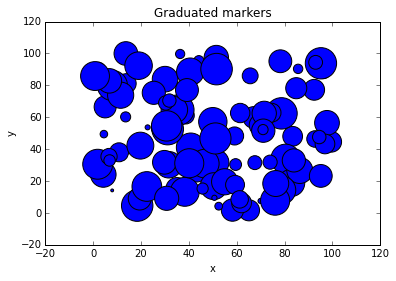

In [22]:
pp.df.plot(kind='scatter', x='x', y='y',s =pp.df['population'])
plt.title('Graduated markers')

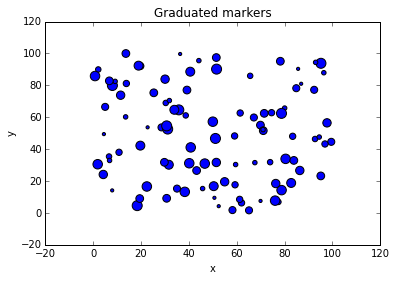

In [23]:
pp.df.plot(kind='scatter', x='x', y='y',s =10*pp.df['factor'])
plt.title('Graduated markers')

In [24]:
np.unique(pp.df.factor)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [25]:
pp.df[pp.df['factor']==1.0]
#pp.df['factor'==1.0]

,x,y,population,factor
3,69.934780,7.518772,25.996886,1
18,7.901020,14.115799,8.104485,1
20,4.429301,49.428115,56.849999,1
39,86.925277,81.020478,11.700199,1
63,52.447467,4.221325,60.533735,1
75,85.649796,90.355852,88.247070,1
77,22.713903,53.671260,25.192423,1
85,36.318343,99.691546,84.863609,1
94,50.647510,9.472097,27.238610,1


In [26]:
pps = pp.explode('factor')

In [27]:
pps

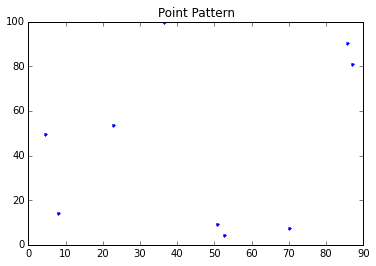

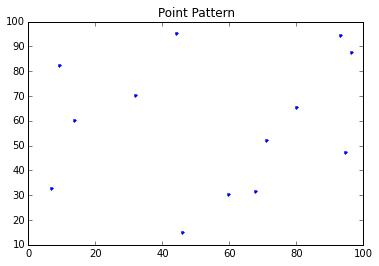

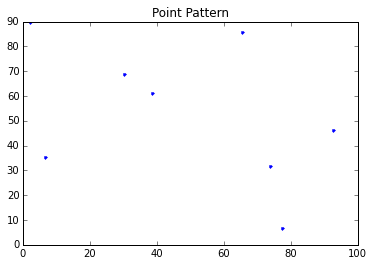

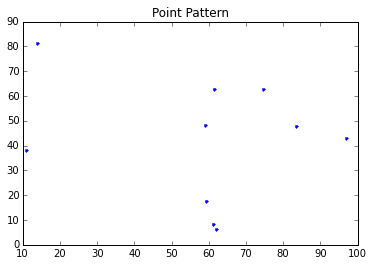

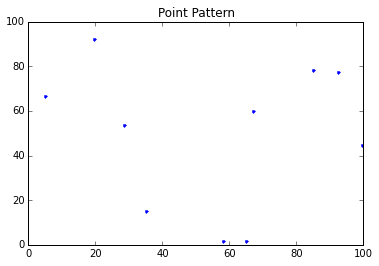

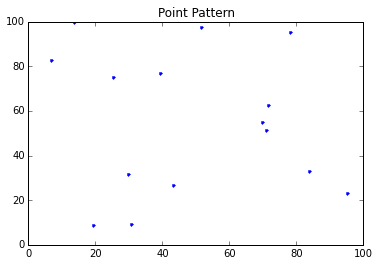

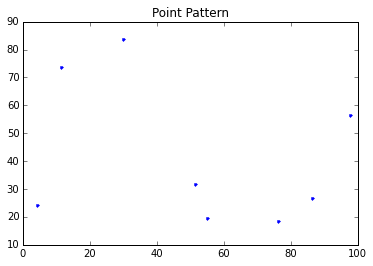

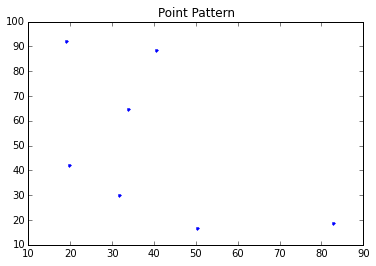

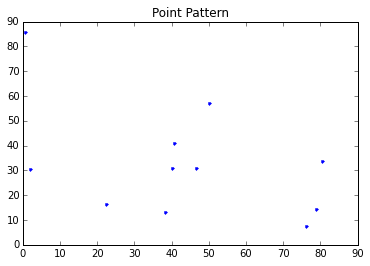

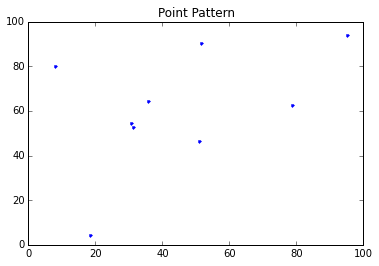

In [30]:
for ppi in pps:
    ppi.plot()


In [31]:
ppi.head()

,x,y,population,factor
17,22.669938,57.014972,938.307978,10
21,38.400254,60.630519,970.696548,10
67,9.581196,94.969597,994.520000,10
77,18.720045,81.741379,928.805612,10
92,66.487117,41.583412,992.446453,10


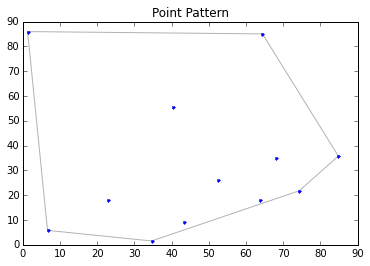

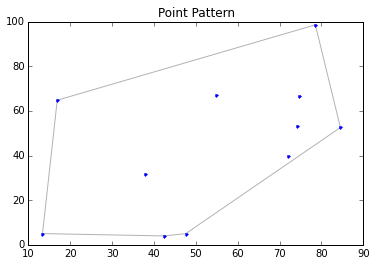

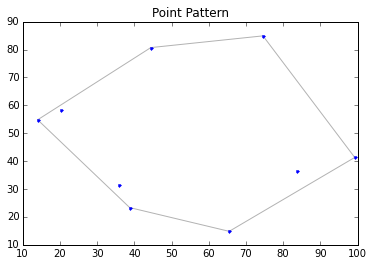

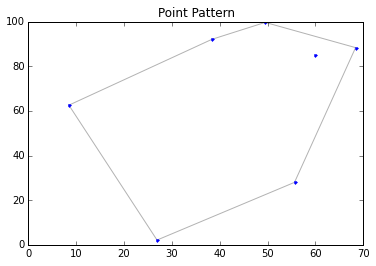

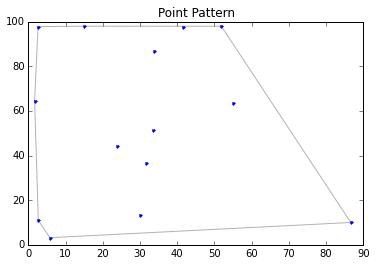

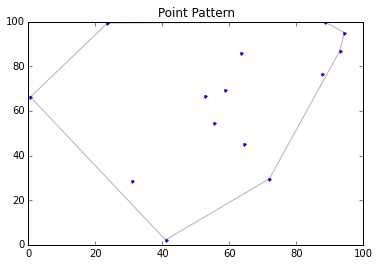

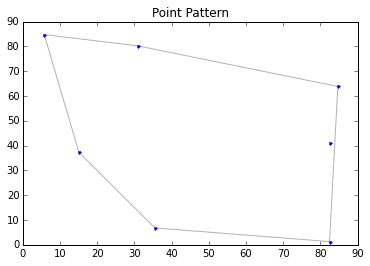

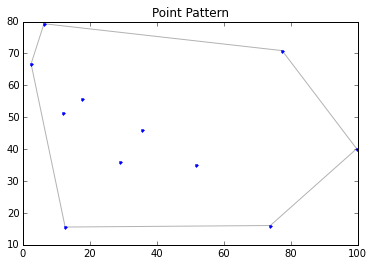

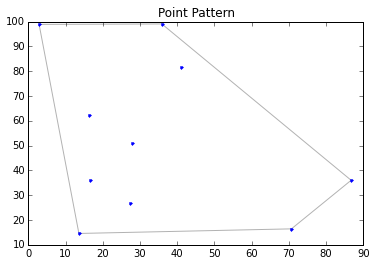

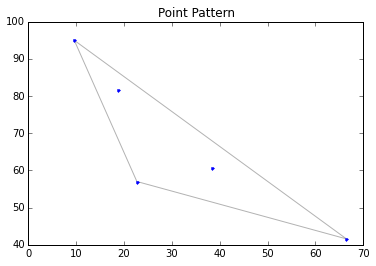

In [33]:
for ppi in pps:
    ppi.plot(hull=True)

In [ ]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("vautm17n.shp"))
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

In [ ]:
from process import PoissonPointProcess as csr
vapp = csr(as_window(state), 300, 1, asPP=True).realizations[0]

In [ ]:
vapp.summary()

In [ ]:
vapp.plot()

In [ ]:
vapp.plot(window=True, title="CSR in VA UTM17N")

In [ ]:
vapp.plot()


In [ ]:
vapp.plot(hull=True)

In [ ]:
vapp.plot(hull=True, window=True)

In [ ]:
vapp.hull

In [ ]:
mark = np.random.normal(0, 1, (300,1))
vapp.add_marks([mark])

In [ ]:
vapp.summary()

In [ ]:
r = vapp.df[mark<1]

In [ ]:
p3 = PointPattern(vapp.df[vapp.df['mark_1']>0], names=['x','y','m1'], coord_names=['x', 'y'])

In [ ]:
p3.summary()